In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import metrics

# a helper function to visualize class regions
def plot_regions(model, step=0.01, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

# 9.6 Lab: Support Vector Machines

## 9.6.1 Support Vector Classifier

In [2]:
from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### linearly separable case

(array([[ 0.44122749, -0.33087015],
        [ 2.43077119, -0.25209213],
        [ 0.10960984,  1.58248112],
        [-0.9092324 , -0.59163666],
        [ 0.18760323, -0.32986996],
        [-1.19276461, -0.20487651],
        [-0.35882895,  0.6034716 ],
        [-1.66478853, -0.70017904],
        [ 1.15139101,  1.85733101],
        [-1.51117956,  0.64484751],
        [ 1.51939211,  1.64314685],
        [ 1.62812082,  2.07749207],
        [ 3.49643983,  3.21242127],
        [ 2.55914424,  2.13668912],
        [ 2.50328884,  2.39406956],
        [ 3.29305332,  1.86842837],
        [ 2.49380509,  2.39893239],
        [ 2.44769185,  2.74921766],
        [ 2.69766009,  3.83484857],
        [ 2.41312439,  4.06153229]]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1]))

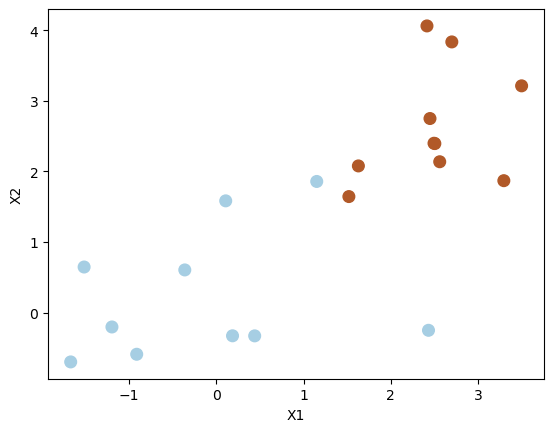

In [3]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([-1,1], 10)

X[y==1] = X[y==1] + 2.5 # shift center of the one class

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')


X, y

In [4]:
svc = SVC(C=1e5, kernel='linear')
svc.fit(X, y)

SVC(C=100000.0, kernel='linear')

In [5]:
# found support vectors
print(svc.support_)

svc.support_vectors_

[ 1  8 10]


array([[ 2.43077119, -0.25209213],
       [ 1.15139101,  1.85733101],
       [ 1.51939211,  1.64314685]])

Text(0, 0.5, 'X2')

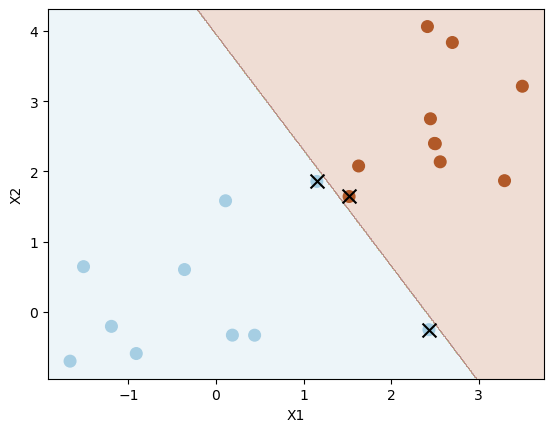

In [6]:
plot_regions(svc)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

In [7]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

Text(0, 0.5, 'X2')

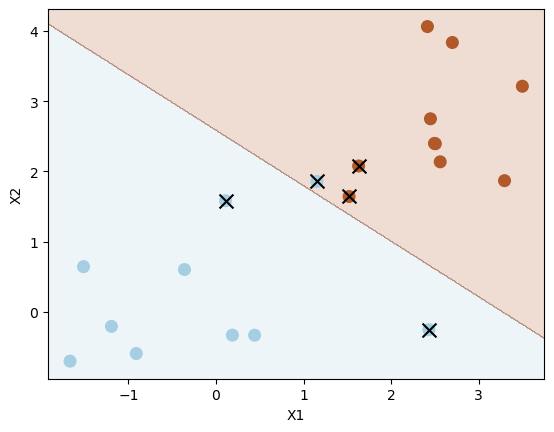

In [8]:
plot_regions(svc)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

## Not linearly separable

In [9]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([-1,1], 10)

X[y==1] = X[y==1]+1 # shift center of the one class

(array([1.00517206, 1.13767782]), array([-0.13161913,  0.22786068]))

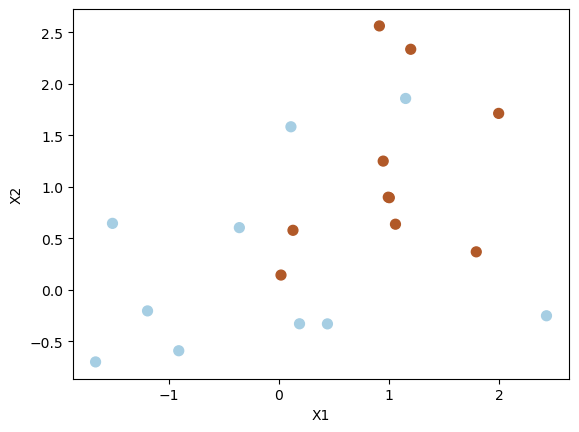

In [10]:
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

np.mean(X[y==1],axis=0), np.mean(X[y==-1],axis=0)

In [11]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

We can now plot the support vector classifier by calling the ${\tt plot\_svc()}$ function on the output of the call to ${\tt SVC()}$, as well as the data used in the call to ${\tt SVC()}$:

Text(0, 0.5, 'X2')

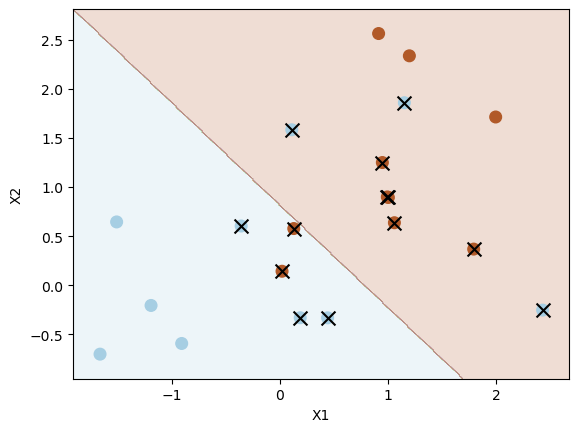

In [12]:
plot_regions(svc)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

### increase C=10
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
```
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
```

In [13]:
svc = SVC(C=1/10, kernel='linear')
svc.fit(X, y)

SVC(C=0.1, kernel='linear')

In [14]:
# found support vectors
print(svc.support_)

svc.support_vectors_

[ 0  1  2  3  4  6  8  9 10 11 13 14 15 16 17 19]


array([[ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-0.35882895,  0.6034716 ],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751],
       [ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 0.91312439,  2.56153229]])

Text(0, 0.5, 'X2')

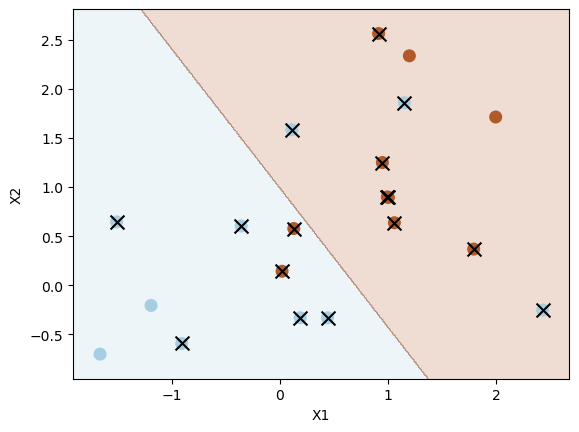

In [15]:
plot_regions(svc)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

# margin is wider -> more support vectors

### 10-fold cross validation using `GridSearchCV`
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [16]:
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 5, 10, 100]
clf = GridSearchCV(SVC(kernel='linear'), param_grid={'C': Cs}, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00019171, 0.00011296, 0.0001117 , 0.00012815, 0.00019841,
        0.00014606, 0.00020463]),
 'std_fit_time': array([9.69982453e-05, 2.18722247e-06, 1.66295891e-06, 3.69399948e-05,
        5.81985368e-05, 4.42931672e-05, 6.58540471e-05]),
 'mean_score_time': array([1.45387650e-04, 8.57353210e-05, 8.49008560e-05, 8.87155533e-05,
        1.22165680e-04, 8.83817673e-05, 8.72612000e-05]),
 'std_score_time': array([8.14635361e-05, 1.12436544e-06, 1.30782968e-06, 1.05090680e-05,
        4.18215275e-05, 3.13962056e-06, 9.23391186e-07]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_tes

Text(0, 0.5, 'mean test score')

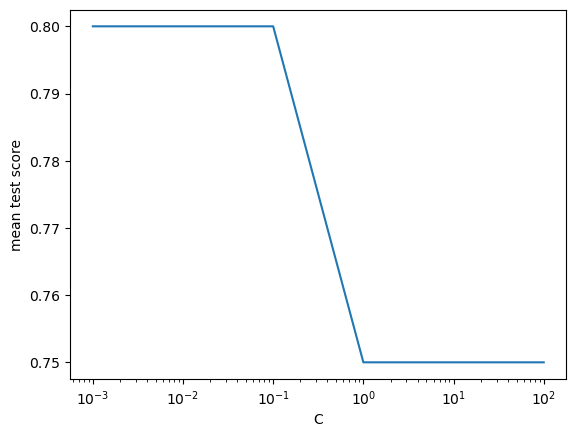

In [18]:
plt.semilogx(Cs, clf.cv_results_['mean_test_score'])
plt.xlabel('C')
plt.ylabel('mean test score')

In [19]:
clf.best_params_

{'C': 0.001}

In [20]:
# generate test data
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.repeat([-1,1], 10)
X_test[y_test==1] = X_test[y_test==1] +1 # shift center of the one class

Now we predict the class labels of these test observations. Here we use the
best model obtained through cross-validation in order to make predictions:

In [21]:
svc_best = SVC(C=0.001, kernel='linear')
svc_best.fit(X, y)
y_pred = svc_best.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred, labels=[-1,1]))

0.85
[[8 2]
 [1 9]]


## 9.6.2 Support Vector Machine

Text(0, 0.5, 'X2')

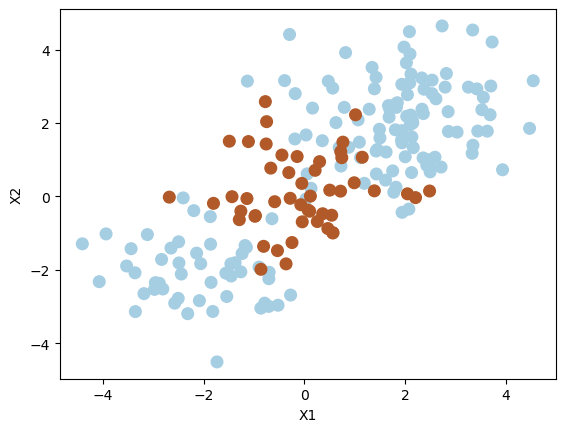

In [22]:
# generate some data with a non-linear class boundary
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [23]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

### C=1, radial kernel  with $\gamma = 1$:

In [24]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(gamma=1)

Text(0, 0.5, 'X2')

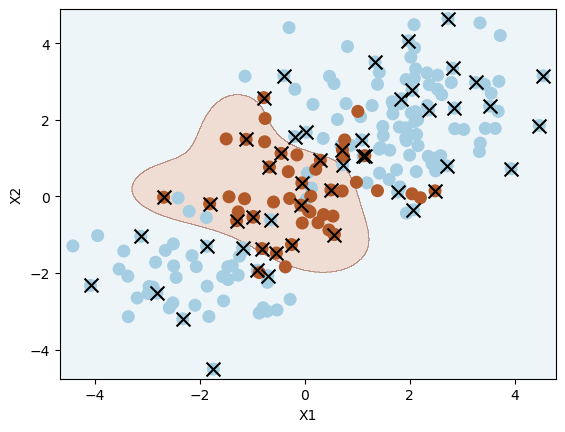

In [25]:
plot_regions(svm)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

In [26]:
print('training error:')
print(metrics.accuracy_score(y_train, svm.predict(X_train)))
print(metrics.confusion_matrix(y_train, svm.predict(X_train), labels=[-1,1]))
print('test error:')
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print(metrics.confusion_matrix(y_test, svm.predict(X_test), labels=[-1,1]))

training error:
0.95
[[76  1]
 [ 4 19]]
test error:
0.85
[[67  6]
 [ 9 18]]


### decrease C -> more flexibility

In [27]:
svm = SVC(C=1e5, kernel='rbf', gamma=1.0)
svm.fit(X_train, y_train)

SVC(C=100000.0, gamma=1.0)

Text(0, 0.5, 'X2')

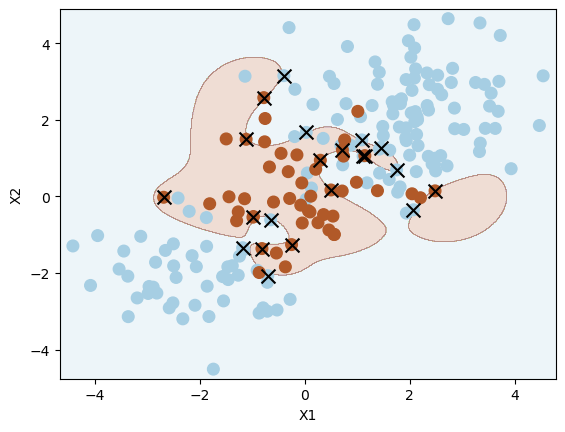

In [28]:
plot_regions(svm)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

In [29]:
print('training error:')
print(metrics.accuracy_score(y_train, svm.predict(X_train)))
print(metrics.confusion_matrix(y_train, svm.predict(X_train), labels=[-1,1]))
print('test error:')
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print(metrics.confusion_matrix(y_test, svm.predict(X_test), labels=[-1,1]))

training error:
1.0
[[77  0]
 [ 0 23]]
test error:
0.79
[[62 11]
 [10 17]]


### decrease $\gamma = 0.1$ -> wider bumps

In [30]:
svm = SVC(C=1e+5, kernel='rbf', gamma=0.1)
svm.fit(X_train, y_train)

SVC(C=100000.0, gamma=0.1)

Text(0, 0.5, 'X2')

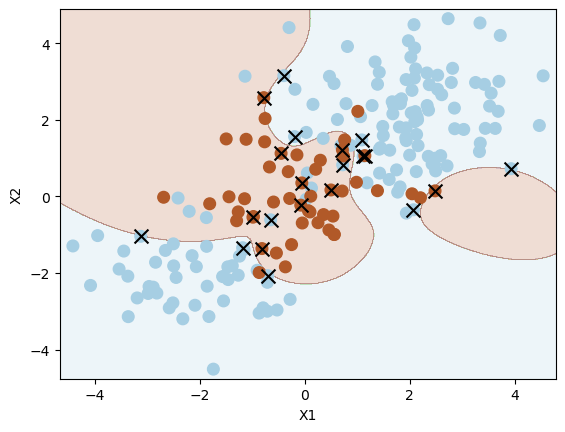

In [31]:
plot_regions(svm)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

### Cross validation

In [32]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [33]:
# Increasing C parameter, allowing more flexibility
svm = SVC(C=10, kernel='rbf', gamma=0.5)
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.5)

Text(0, 0.5, 'X2')

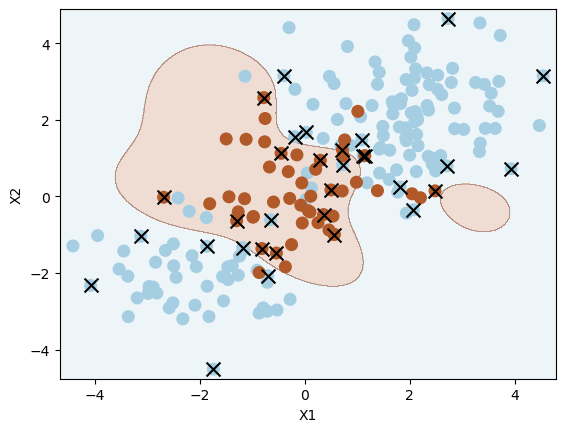

In [34]:
plot_regions(svm)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], c='k', marker='x', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

In [35]:
print('training error:')
print(metrics.accuracy_score(y_train, svm.predict(X_train)))
print(metrics.confusion_matrix(y_train, svm.predict(X_train), labels=[-1,1]))
print('test error:')
print(metrics.accuracy_score(y_test, svm.predict(X_test)))
print(metrics.confusion_matrix(y_test, svm.predict(X_test), labels=[-1,1]))

training error:
0.95
[[75  2]
 [ 3 20]]
test error:
0.87
[[66  7]
 [ 6 21]]


## 9.6.3 ROC Curves
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
* https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

In [36]:
svm1 = SVC(C=1, kernel='rbf', gamma=1)
svm1.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [37]:
svm2 = SVC(C=1, kernel='rbf', gamma=50) # more flexible
svm2.fit(X_train, y_train)

SVC(C=1, gamma=50)

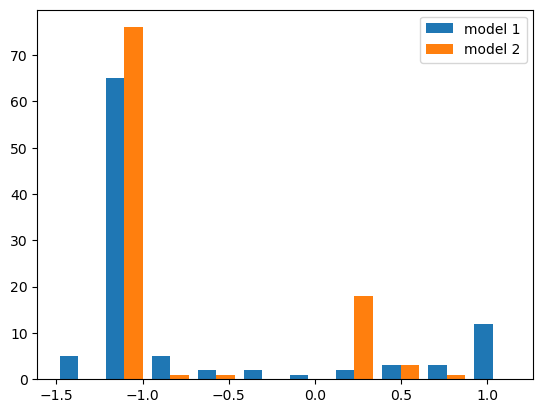

In [38]:
y_train_score1 = svm1.decision_function(X_train)
y_train_score2 = svm2.decision_function(X_train)

plt.hist([y_train_score1, y_train_score2])
plt.legend(('model 1', 'model 2'))

0.8726534753932015
0.8396752917300863


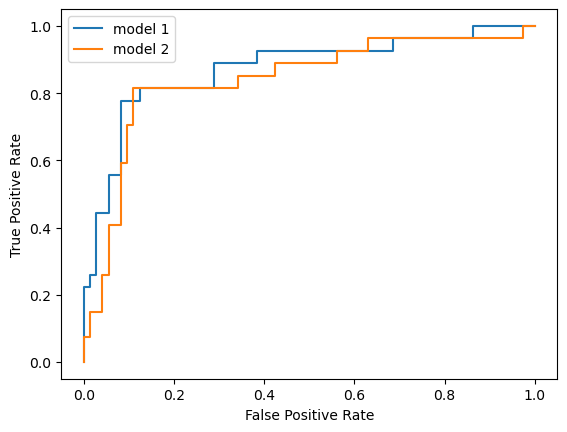

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

y_score = svm1.decision_function(X_test)

ax = plt.subplot(111)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax)
print(auc(fpr, tpr))


y_score = svm2.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
print(auc(fpr, tpr))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax)

ax.legend(['model 1', 'model 2'])

